### Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### Load `Advertising.csv` dataset pandas

In [4]:
# Load the dataset
df = pd.read_csv('data/Advertising.csv', index_col=0)

# Display the first few rows of the dataframe
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### Standardize each column of the dataset

In [6]:
# Standardize the features (TV, Radio, Newspaper) using sklearn's StandardScaler
scaler = StandardScaler()
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Standardize the features
X_scaled = scaler.fit_transform(X)

# Create a DataFrame for the standardized features
X_scaled_df = pd.DataFrame(X_scaled, columns=['TV', 'Radio', 'Newspaper'])

# Display the standardized data
X_scaled_df.head()

,TV,Radio,Newspaper
0,0.969852,0.981522,1.778945
1,-1.197376,1.082808,0.669579
2,-1.516155,1.528463,1.783549
3,0.052050,1.217855,1.286405
4,0.394182,-0.841614,1.281802


### Add column of ones

In [8]:
# Add an intercept column (all ones)
X_scaled = np.c_[np.ones(X_scaled.shape[0]), X_scaled]

# Create a DataFrame for the standardized features with intercept
X_scaled_df = pd.DataFrame(X_scaled, columns=['Intercept', 'TV', 'Radio', 'Newspaper'])

# Display the standardized data with the intercept
X_scaled_df.head()

,Intercept,TV,Radio,Newspaper
0,1.0,0.969852,0.981522,1.778945
1,1.0,-1.197376,1.082808,0.669579
2,1.0,-1.516155,1.528463,1.783549
3,1.0,0.052050,1.217855,1.286405
4,1.0,0.394182,-0.841614,1.281802


### Divide the dataset into training and testing

In [10]:
# Split the dataset into training (85%) and testing (15%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=42)

# Display the shapes of the resulting datasets
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (170, 4), (170,)
Testing set shape: (30, 4), (30,)


### Initialize weights

In [12]:
# Function to initialize weights
def initialize_weights(n_features, seed=None):
    if seed is not None:
        np.random.seed(seed)  # Set the random seed for reproducibility
    init_w = np.random.uniform(0, 1, n_features)  # Initialize weights for features + intercept
    return init_w

# Initialize weights with a random seed
weights = initialize_weights(X_train.shape[1], seed=42)
print("Initial Weights:", weights)

Initial Weights: [0.37454012 0.95071431 0.73199394 0.59865848]


### Prediction function

In [14]:
# Function to compute predictions based on input features X and weights
def predict(X, weights):
    # Compute predictions by multiplying the feature matrix with the weights
    y_hat = np.dot(X, weights)
    return y_hat

### Cost function

In [16]:
# Function to compute cost (Mean Squared Error)
def compute_cost(X, y, weights):
    # Get the number of training examples
    m = len(y)
    
    # Predict the values using the current weights
    y_hat = predict(X, weights)
    
    # Compute the cost using the mean squared error formula
    cost = (1 / (2 * m)) * np.sum((y_hat - y) ** 2)
    
    return cost

### Compute Gradient

In [18]:
# Function to compute gradient
def compute_gradient(X, y, weights):
    # Get the number of training examples
    m = len(y)
    
    # Predict the values using the current weights
    y_hat = predict(X, weights)
    
    # Compute the gradient: (1/m) * X.T * (y_hat - y)
    gradient = (1 / m) * np.dot(X.T, (y_hat - y))
    
    return gradient

### Update Weights

In [20]:
# Function to update weights
def update_weights(weights, gradient, learning_rate):
    # Update the weights by subtracting the gradient scaled by the learning rate
    updated_weights = weights - learning_rate * gradient
    
    return updated_weights

### Grad Descent

In [22]:
# Gradient Descent Function
def grad_descent(X, y, weights, learning_rate, iterations, tolerance=1e-6):
    # Initialize arrays to store the cost values and weight values at each iteration
    cost_values = []
    weights_values = []

    for i in range(iterations):
        # Compute the current cost and store it
        cost = compute_cost(X, y, weights)
        cost_values.append(cost)

        # Compute the current gradient
        gradient = compute_gradient(X, y, weights)
        
        # Update the weights
        weights = update_weights(weights, gradient, learning_rate)
        
        # Store the updated weights
        weights_values.append(weights.copy())

        # Optionally: print the progress at certain intervals
        if i % 100 == 0:
            print(f"Iteration {i}/{iterations} | Cost: {cost:.4f}")
        
        # Early stopping if the change in cost is very small
        if i > 0 and abs(cost_values[-1] - cost) < tolerance:
            print(f"Converged at iteration {i}")
            break

    # Convert lists to numpy arrays for easier processing later
    cost_values = np.array(cost_values)
    weights_values = np.array(weights_values)

    return weights_values, cost_values

# Set hyperparameters
iterations = 1000  # Number of iterations
learning_rate = 0.01  # Learning rate

# Perform gradient descent
weights_values, cost_values = grad_descent(X_train, y_train, weights, learning_rate, iterations)

# Print final weights and cost
print("Final weights after gradient descent:", weights_values[-1])
print("Final cost after gradient descent:", cost_values[-1])

Iteration 0/1000 | Cost: 101.7739
Converged at iteration 1
Final weights after gradient descent: [0.64767223 1.01779981 0.76750378 0.59877199]
Final cost after gradient descent: 99.75462071164438


### Plotting Cost Over Iterations

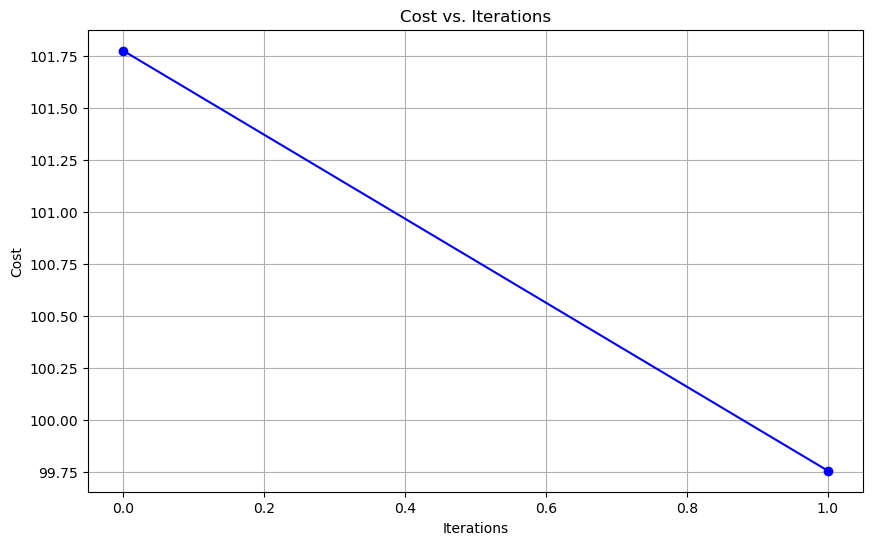

In [24]:
# Plotting the cost over iterations
def plot_costs(cost_values):
    iterations = len(cost_values)
    
    # Plotting the cost values
    plt.figure(figsize=(10, 6))
    plt.plot(range(iterations), cost_values, color='blue', linestyle='-', marker='o')
    plt.title('Cost vs. Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.grid(True)
    plt.show()

# Plot cost values
plot_costs(cost_values)

### Predictions and Cost Evaluation

In [26]:
# Predict y for the train set and calculate the cost
y_train_pred = predict(X_train, weights_values[-1])
train_cost = compute_cost(X_train, y_train, weights_values[-1])
print(f"Train MSE (Cost): {train_cost:.4f}")

# Predict y for the test set and calculate the cost
y_test_pred = predict(X_test, weights_values[-1])
test_cost = compute_cost(X_test, y_test, weights_values[-1])
print(f"Test MSE (Cost): {test_cost:.4f}")

Train MSE (Cost): 97.7760
Test MSE (Cost): 93.0100


### Reverting Predictions to Original Scale

In [28]:
# Calculate the mean and standard deviation of the target variable (Sales) from the original dataset
sales_mean = df['Sales'].mean()
sales_std = df['Sales'].std()

# Revert the predicted values for the train set
y_train_pred_original = y_train_pred * sales_std + sales_mean
# Revert the predicted values for the test set
y_test_pred_original = y_test_pred * sales_std + sales_mean

print(f"Reverted Train Predictions (Original Scale): {y_train_pred_original}")
print(f"Reverted Test Predictions (Original Scale): {y_test_pred_original}")

Reverted Train Predictions (Original Scale): [13.7405334  10.06527221 31.91878755 23.31999852 24.08456085 22.40656236
 14.52540319 30.97079936  9.61827761  2.71425393 10.19649463 12.01004463
 12.53924489  7.50131577 14.38173305  2.95329959 12.17096246 15.9424792
 10.57383104 12.0675221  20.06433284 11.80227335 22.14676077 15.87815051
  4.68167448 11.66583017  8.60277716 34.36383288  6.69456846 11.64723013
 19.01501663 17.90688155 14.85607749 18.04302625 17.95631012  6.33573172
 23.55389392  5.39598232  8.58961331 11.06972578  6.93868913  3.89567478
 17.85747457 23.17145346 26.76097711 17.70530986 16.19502154 21.17959939
 19.71444705 26.19817854 21.04295459 14.81981796 10.97250843 19.82688929
  6.06429572 24.00287005 19.68341084 26.71177999 11.99613911 33.21428444
  9.85015912 30.05423113 40.30411269 19.51993685 17.97738213 17.37102646
 15.71699515 13.41340003 20.29646277 20.25172451 20.12920002  8.34657453
 25.69967913  8.10734195 21.50095703 13.16066473  6.74673519 20.55513374
 13.003